In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder

dataset = pd.read_csv('heart_2020_cleaned.csv')
dataset.head()

# number of data in the dataset
print("Number of data in the dataset: ", len(dataset.index))
print(dataset.shape[0])

Number of data in the dataset:  319795
319795


In [2]:
if dataset.duplicated().any():      # checking for duplicate data
    dataset.drop_duplicates(inplace=True)       # removing the duplicates
    print("Number of data after removing duplicates: ", dataset.shape[0])
else: 
    print("No duplicates")

Number of data after removing duplicates:  301717


In [3]:
if dataset.isnull().values.any():    # checking for null data
    print(dataset.isnull().sum())
    dataset.dropna()        # removing the null values
    print("Number of data after removing null values: ", dataset.shape[0])
else:
    print("No null values")

No null values


In [5]:
no_of_target_data = dataset['HeartDisease'].value_counts()      # checking the number of 'yes' and 'no' in the label
print(no_of_target_data)

No     274456
Yes     27261
Name: HeartDisease, dtype: int64


In [6]:
# We haven't encoded BMI, sleeptime, MentalHealth and PhysicalHealth
# They are already integers and floats

label_encoder = LabelEncoder()

label_encoder.fit(dataset['HeartDisease'])
dataset['HeartDisease']=label_encoder.transform(dataset['HeartDisease'])

label_encoder.fit(dataset['Smoking'])
dataset['Smoking']=label_encoder.transform(dataset['Smoking'])

label_encoder.fit(dataset['AlcoholDrinking'])
dataset['AlcoholDrinking']=label_encoder.transform(dataset['AlcoholDrinking'])

label_encoder.fit(dataset['Stroke'])
dataset['Stroke']=label_encoder.transform(dataset['Stroke'])

label_encoder.fit(dataset['DiffWalking'])
dataset['DiffWalking']=label_encoder.transform(dataset['DiffWalking'])

label_encoder.fit(dataset['Sex'])
dataset['Sex']=label_encoder.transform(dataset['Sex'])

label_encoder.fit(dataset['AgeCategory'])
dataset['AgeCategory']=label_encoder.transform(dataset['AgeCategory'])

label_encoder.fit(dataset['Race'])
dataset['Race']=label_encoder.transform(dataset['Race'])

label_encoder.fit(dataset['Diabetic'])
dataset['Diabetic']=label_encoder.transform(dataset['Diabetic'])

label_encoder.fit(dataset['PhysicalActivity'])
dataset['PhysicalActivity']=label_encoder.transform(dataset['PhysicalActivity'])

label_encoder.fit(dataset['GenHealth'])
dataset['GenHealth']=label_encoder.transform(dataset['GenHealth'])

label_encoder.fit(dataset['Asthma'])
dataset['Asthma']=label_encoder.transform(dataset['Asthma'])

label_encoder.fit(dataset['KidneyDisease'])
dataset['KidneyDisease']=label_encoder.transform(dataset['KidneyDisease'])

label_encoder.fit(dataset['SkinCancer'])
dataset['SkinCancer']=label_encoder.transform(dataset['SkinCancer'])

In [7]:
print("Dataset after encoding the labels")
dataset.head()

Dataset after encoding the labels


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


<Axes: >

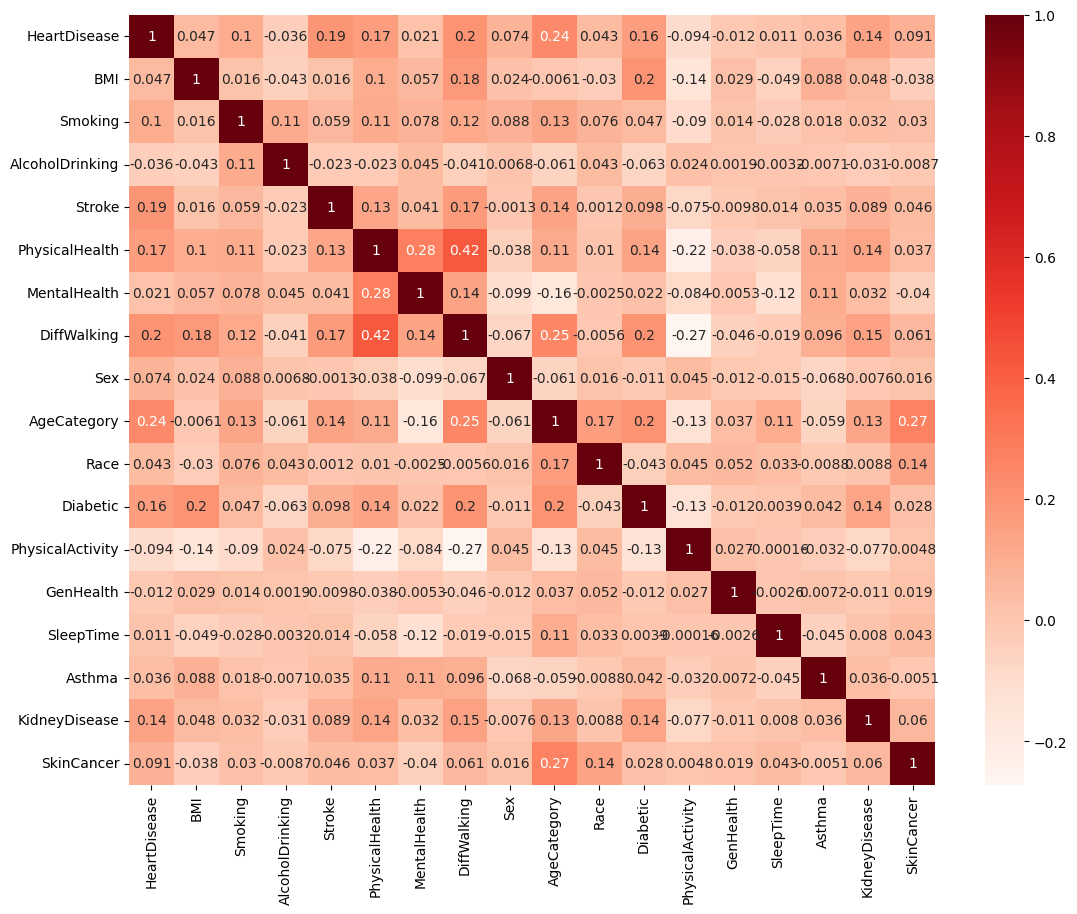

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns

# Correlation matrix
plt.figure(figsize= (13,10))
sns.heatmap(dataset.corr(),annot = True,cmap='Reds')

In [17]:
# defining features and label
x = dataset.drop(["HeartDisease"], axis = 1).values     # feature
y = dataset["HeartDisease"].values      # label

In [23]:
# data scaling
# robust_scaler = RobustScaler()

# x_train = robust_scaler.fit_transform(x_train)
# x_test = robust_scaler.fit_transform(x_test)

Implementing RandomForest by Handling Imbalanced Dataset using SMOTE

In [18]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter_before = Counter(y)
print("Before oversampling: No. of data = ", counter_before)

smote = SMOTE(random_state=42)
x1, y1 = smote.fit_resample(x, y)

counter_after = Counter(y1)
print("After oversampling: No. of data = ", counter_after)

Before oversampling: No. of data =  Counter({0: 274456, 1: 27261})
After oversampling: No. of data =  Counter({0: 274456, 1: 274456})


In [19]:
# splitting the oversampled dataset
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.20, random_state=42)

print("Total number of data: ", x1.shape[0])
print("Total number of train data: ", x1_train.shape[0])
print("Total number of test data: ", x1_test.shape[0])

Total number of data:  548912
Total number of train data:  439129
Total number of test data:  109783


Decision Tree

In [20]:
from sklearn import tree
d_tree1 = tree.DecisionTreeClassifier()
d_tree1.fit(x1_train, y1_train)
d_tree_pred = d_tree1.predict(x1_test)

accuracy = accuracy_score(y1_test, d_tree_pred)
print("Accuracy: ", accuracy*100, "%")

Accuracy:  90.91571554794459 %


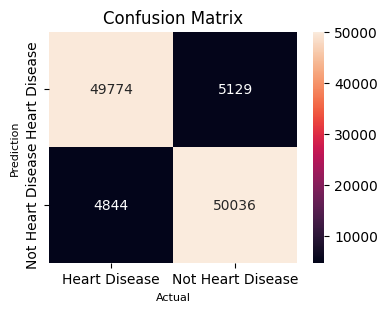

Accuracy:  90.91571554794459 %
Precision:  0.9070243814012507
Recall:  0.911734693877551
AUC (Area under the curve) score:  0.909157695371466


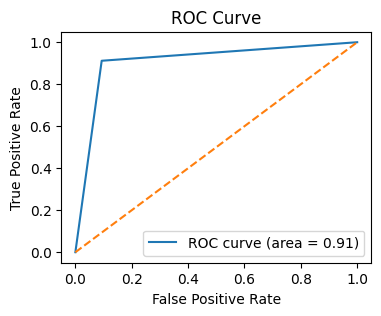

In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve

# Confusion Matrix
conf_matrix = confusion_matrix(y1_test, d_tree_pred)

plt.figure(figsize= (4,3))
sns.heatmap(conf_matrix, 
            annot=True,
            fmt='g', 
            xticklabels=['Heart Disease','Not Heart Disease'],
            yticklabels=['Heart Disease','Not Heart Disease'])
plt.ylabel('Prediction',fontsize=8)
plt.xlabel('Actual',fontsize=8)
plt.title('Confusion Matrix',fontsize=12)
plt.show()

# Accuracy
accuracy = accuracy_score(y1_test, d_tree_pred)
print("Accuracy: ", accuracy*100, "%")

# precision_score and recall_score 
precision = precision_score(y1_test, d_tree_pred)
print("Precision: ", precision)
recall = recall_score(y1_test, d_tree_pred)
print("Recall: ", recall)

# roc_auc score
roc_auc = roc_auc_score(y1_test, d_tree_pred)
print("AUC (Area under the curve) score: ", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y1_test, d_tree_pred)
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()